In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris

from sklearn.preprocessing import StandardScaler

#分類問題
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#回帰問題
from sklearn.linear_model import SGDRegressor

from sklearn import metrics
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 【問題1】train_test_splitのスクラッチ
スクラッチの練習として、scikit-learnのtrain_test_splitを自作してみます。以下の雛形をベースとして関数を完成させてください。


[sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)


なお、作成した関数がscikit-learnのtrain_test_splitと同じ動作をしているか必ず確認をするようにしましょう。

In [2]:
def check_array_length(X, y):
    """
    配列の長さをチェックする。
    """
    x_arrays = len(X)
    y_arrays = len(y)
    if x_arrays == 0 or y_arrays == 0:
        raise ValueError("At least one array required as input")
    if x_arrays != y_arrays:
        raise ValueError("Found input variables with inconsistent numbers")

In [3]:
def check_train_and_test_size(train_size):
    """
    訓練データのサイズをチェックする。
    """
    if train_size >= 1 or train_size <= 0:
        raise ValueError(
            'train_size = {}, should be in the (0, 1)'
            ' range. Reduce or increase train_size.'
            .format(train_size))

In [4]:
def copy_to_list(target_array):
    """
    元データのデータタイプを判定の上、
    リストのコピーを作成する。
    """
    if (type(target_array) is pd.core.frame.DataFrame):
        return target_array.values.tolist()
    if (type(target_array) is np.ndarray):
        return list(target_array)
    if (type(target_array) is pd.core.series.Series):
        return target_array.values.tolist()
    if (type(target_array) is list):
        return target_array
    if (type(target_array) is range):
        return list(target_array)    

In [5]:
def return_to_original_array(target_array, train_array, test_array):
    """
    リスト型で処理が進められたデータを元のデータ型に変換する。
    """
    # From list to DataFrame
    if (type(target_array) is pd.core.frame.DataFrame): 
        array_train_row = len(train_array)
        array_test_row = len(target_array) - array_train_row
        array_column = target_array.shape[1]
        column_name = target_array.columns
        
        train_array = pd.DataFrame(np.array(train_array).reshape(array_train_row, array_column), columns=column_name)
        test_array = pd.DataFrame(np.array(test_array).reshape(array_test_row, array_column), columns=column_name)
        return train_array, test_array

    # From list to ndarray
    if (type(target_array) is np.ndarray): 
        array_train_row = len(train_array)
        array_test_row = len(target_array) - array_train_row
        if target_array.ndim >= 2:
            array_column = target_array.shape[1]        
            train_array = np.array(train_array).reshape(array_train_row, array_column)
            test_array = np.array(test_array).reshape(array_test_row, array_column)
        else:
            train_array = np.array(train_array).reshape(array_train_row)
            test_array = np.array(test_array).reshape(array_test_row)            
        return train_array, test_array

    # From list to Series
    if (type(target_array) is pd.core.series.Series): 
        array_train_row = len(train_array)
        array_test_row = len(target_array) - array_train_row
        train_index_name = target_array.index[:array_train_row]
        test_index_name = target_array.index[array_train_row:]        
        
        train_array = pd.Series(train_array, index=train_index_name)
        test_array = pd.Series(test_array, index=test_index_name)
        return train_array, test_array

In [6]:
from random import seed
from random import randrange

def scratch_train_test_split(X, y, train_size=0.7):
    """
    検証データを分割する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, )
      正解値
    train_size : float (0<train_size<1)
      何割をtrainとするか指定

    Returns
    ----------
    x_train_array : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    x_test_array : 次の形のndarray, shape (n_samples, n_features)
      検証データ
    y_train_array : 次の形のndarray, shape (n_samples, n_features)
      訓練データの正解値
    y_test_array : 次の形のndarray, shape (n_samples, n_features)
      検証データの正解値
    """            
    check_array_length(X, y)
    check_train_and_test_size(train_size)

    x_train_array = list()
    y_train_array = list()
    train_size = int(train_size * len(X))
    x_copy = copy_to_list(X)
    y_copy = copy_to_list(y)
    while len(x_train_array) < train_size:
        index = randrange(len(x_copy))
        x_train_array.append(x_copy.pop(index))
        y_train_array.append(y_copy.pop(index))

    x_test_array = x_copy
    y_test_array = y_copy
    if not(type(X) is list) and not(type(X) is range):
        x_train_array, x_test_array = return_to_original_array(X, x_train_array, x_test_array)
    if not(type(y) is list) and not(type(y) is range):
        y_train_array, y_test_array = return_to_original_array(y, y_train_array, y_test_array)
    return x_train_array, x_test_array, y_train_array, y_test_array

下記はテストに使用したデータ

In [7]:
a = np.arange(4)
index = ['A', 'B', 'C', 'D']
name = 'sample'
y = pd.Series(data=a, index=index, name=name, dtype='float')
X = range(4)
y.index[:2]

Index(['A', 'B'], dtype='object')

In [8]:
X, y = np.arange(10).reshape((5, 2)), range(5)

In [9]:
column = ['test_1', 'test2']
X = pd.DataFrame(X, columns=column)

In [10]:
X_train, X_test, y_train, y_test = scratch_train_test_split(X, y, train_size=0.7)
#X_train, X_test, y_train, y_test = scratch_train_test_split(X, y, train_size=0.8)

### 【問題2】 分類問題を解くコードの作成
上記3種類の手法で3種類のデータセットを学習・推定するコードを作成してください。

#### 1. irisデータセット

In [11]:
iris_dataset = load_iris()

In [12]:
#オリジナルデータの作成
x_origin_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X_origin = pd.DataFrame(iris_dataset.data, columns=x_origin_columns)
y_origin = pd.DataFrame(iris_dataset.target, columns=['Species'])
df_origin = pd.concat([X_origin, y_origin], axis=1)

In [13]:
rows_to_drop = df_origin.index[df_origin['Species'] == 0 ] #'setosa'の行を削除
df = df_origin.drop(rows_to_drop, axis=0).reset_index(drop=True)
X = df.iloc[:, :-1].to_numpy()
y = df.loc[:, 'Species'].to_numpy()

- 前処理・訓練データと検証データの分割

In [14]:
X_train, X_test, y_train, y_test = scratch_train_test_split(X, y, train_size=0.70)

- 前処理・標準化

In [15]:
scaler = StandardScaler()

In [16]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
X_train_scaled = scaler.transform(X_train)

In [18]:
X_test_scaled = scaler.transform(X_test)

1. ロジスティック回帰

In [19]:
def evaluate(y_true, y_pred):
    """
    2値分類の評価指標を計算・描画する。
    """
    acc = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    
    plt.figure(figsize=(1.6, 1.2))
    cm_def = metrics.confusion_matrix(y_test, y_pred)
    sns.heatmap(cm_def, annot=True, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()
    return acc, precision, recall, f1

In [20]:
lr_model = SGDClassifier(loss="log")
lr_model.fit(X_train_scaled, y_train.ravel())
lr_pred = lr_model.predict(X_test_scaled)

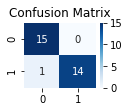

Accuracy : 0.97
Precision : 0.94
Recall : 1.00
F1 : 0.97



In [21]:
print('Accuracy : {:.2f}\n'
      'Precision : {:.2f}\n'
      'Recall : {:.2f}\n'
      'F1 : {:.2f}\n'
      .format(*evaluate(y_test, lr_pred)))

2. SVM

In [22]:
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train.ravel())
svm_pred = svm_model.predict(X_test_scaled)

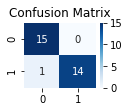

Accuracy : 0.97
Precision : 0.94
Recall : 1.00
F1 : 0.97



In [23]:
print('Accuracy : {:.2f}\n'
      'Precision : {:.2f}\n'
      'Recall : {:.2f}\n'
      'F1 : {:.2f}\n'
      .format(*evaluate(y_test, svm_pred)))

3. 決定木

In [24]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train.ravel())
dt_pred = dt_model.predict(X_test_scaled)

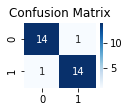

Accuracy : 0.93
Precision : 0.93
Recall : 0.93
F1 : 0.93



In [25]:
print('Accuracy : {:.2f}\n'
      'Precision : {:.2f}\n'
      'Recall : {:.2f}\n'
      'F1 : {:.2f}\n'
      .format(*evaluate(y_test, dt_pred)))

#### 2. シンプルデータセット1

In [26]:
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))
X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)
random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]

- 前処理・訓練データと検証データの分割

In [27]:
X_train, X_test, y_train, y_test = scratch_train_test_split(X, y, train_size=0.70)

- 前処理・標準化

In [28]:
scaler = StandardScaler()

In [29]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [30]:
X_train_scaled = scaler.transform(X_train)

In [31]:
X_test_scaled = scaler.transform(X_test)

1. ロジスティック回帰

In [32]:
lr_model = SGDClassifier(loss="log")
lr_model.fit(X_train_scaled, y_train.ravel())
lr_pred = lr_model.predict(X_test_scaled)

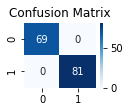

Accuracy : 1.00
Precision : 1.00
Recall : 1.00
F1 : 1.00



In [33]:
print('Accuracy : {:.2f}\n'
      'Precision : {:.2f}\n'
      'Recall : {:.2f}\n'
      'F1 : {:.2f}\n'
      .format(*evaluate(y_test, lr_pred)))

2. SVM

In [34]:
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train.ravel())
svm_pred = svm_model.predict(X_test_scaled)

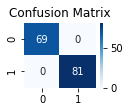

Accuracy : 1.00
Precision : 1.00
Recall : 1.00
F1 : 1.00



In [35]:
print('Accuracy : {:.2f}\n'
      'Precision : {:.2f}\n'
      'Recall : {:.2f}\n'
      'F1 : {:.2f}\n'
      .format(*evaluate(y_test, svm_pred)))

3. 決定木

In [36]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train.ravel())
dt_pred = dt_model.predict(X_test_scaled)

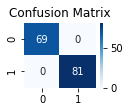

Accuracy : 1.00
Precision : 1.00
Recall : 1.00
F1 : 1.00



In [37]:
print('Accuracy : {:.2f}\n'
      'Precision : {:.2f}\n'
      'Recall : {:.2f}\n'
      'F1 : {:.2f}\n'
      .format(*evaluate(y_test, dt_pred)))

#### 3. シンプルデータセット2

In [38]:
X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

- 前処理・訓練データと検証データの分割

In [39]:
X_train, X_test, y_train, y_test = scratch_train_test_split(X, y, train_size=0.70)

- 前処理・標準化

In [40]:
scaler = StandardScaler()

In [41]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [42]:
X_train_scaled = scaler.transform(X_train)

In [43]:
X_test_scaled = scaler.transform(X_test)

1. ロジスティック回帰

In [44]:
lr_model = SGDClassifier(loss="log")
lr_model.fit(X_train_scaled, y_train.ravel())
lr_pred = lr_model.predict(X_test_scaled)

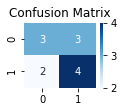

Accuracy : 0.58
Precision : 0.57
Recall : 0.67
F1 : 0.62



In [45]:
print('Accuracy : {:.2f}\n'
      'Precision : {:.2f}\n'
      'Recall : {:.2f}\n'
      'F1 : {:.2f}\n'
      .format(*evaluate(y_test, lr_pred)))

2. SVM

In [46]:
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train.ravel())
svm_pred = svm_model.predict(X_test_scaled)

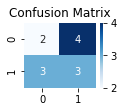

Accuracy : 0.42
Precision : 0.43
Recall : 0.50
F1 : 0.46



In [47]:
print('Accuracy : {:.2f}\n'
      'Precision : {:.2f}\n'
      'Recall : {:.2f}\n'
      'F1 : {:.2f}\n'
      .format(*evaluate(y_test, svm_pred)))

3. 決定木

In [48]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train.ravel())
dt_pred = dt_model.predict(X_test_scaled)

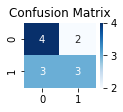

Accuracy : 0.58
Precision : 0.60
Recall : 0.50
F1 : 0.55



In [49]:
print('Accuracy : {:.2f}\n'
      'Precision : {:.2f}\n'
      'Recall : {:.2f}\n'
      'F1 : {:.2f}\n'
      .format(*evaluate(y_test, dt_pred)))

### 【問題3】 回帰問題を解くコードの作成

<u>回帰問題</u>
回帰は1種類をスクラッチします。


- 線形回帰

線形回帰は勾配降下法を用いて計算するSGDRegressorクラスを利用してください。


[sklearn.linear_model.SGDRegressor — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)


データセットは事前学習期間同様にHouse Pricesコンペティションのものを使います。


[House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)


`train.csv`をダウンロードし、目的変数として`SalePrice`、説明変数として、`GrLivArea`と`YearBuilt`を使います。

線形回帰でHouse Pricesデータセットを学習・推定するコードを作成してください。

In [50]:
df_train = pd.read_csv('train.csv')

In [51]:
x_columns = ['GrLivArea', 'YearBuilt']
y_column = ['SalePrice']

X_two_columns = pd.DataFrame(df_train, columns=x_columns)
y_saleprice = pd.DataFrame(df_train, columns=y_column)

df_concat = pd.concat([X_two_columns, y_saleprice], axis=1)

In [52]:
df_concat.head()

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


In [53]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
GrLivArea    1460 non-null int64
YearBuilt    1460 non-null int64
SalePrice    1460 non-null int64
dtypes: int64(3)
memory usage: 34.3 KB


- 分布の確認

   1. SalePrice

<AxesSubplot:xlabel='Sale Price'>

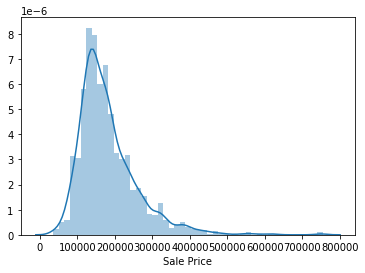

In [54]:
sns.distplot(df_concat['SalePrice'], axlabel='Sale Price')

In [55]:
print("歪度(Skewness) :", df_concat['SalePrice'].skew())
print("尖度(Kurtosis) :", df_concat['SalePrice'].kurt())

歪度(Skewness) : 1.8828757597682129
尖度(Kurtosis) : 6.536281860064529


In [56]:
df_concat['SalePrice_Log'] = df_concat['SalePrice'].apply(np.log)
df_concat['SalePrice_Log'].head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice_Log, dtype: float64

<AxesSubplot:xlabel='Sale Price Log'>

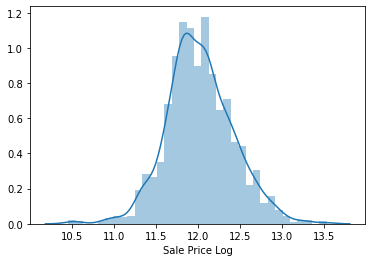

In [57]:
sns.distplot(df_concat['SalePrice_Log'], axlabel='Sale Price Log')

In [58]:
print("歪度(Skewness) :", df_concat['SalePrice_Log'].skew())
print("尖度(Kurtosis) :", df_concat['SalePrice_Log'].kurt())

歪度(Skewness) : 0.12133506220520406
尖度(Kurtosis) : 0.8095319958036296


2. GrLivArea

<AxesSubplot:xlabel='GrLivArea'>

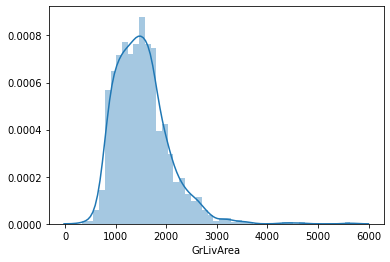

In [59]:
sns.distplot(df_concat['GrLivArea'])

In [60]:
print("歪度(Skewness) :", df_concat['GrLivArea'].skew())
print("尖度(Kurtosis) :", df_concat['GrLivArea'].kurt())

歪度(Skewness) : 1.3665603560164552
尖度(Kurtosis) : 4.895120580693174


In [61]:
df_concat['GrLivArea_Log'] = df_concat['GrLivArea'].apply(np.log)
df_concat['GrLivArea_Log'].head()

0    7.444249
1    7.140453
2    7.487734
3    7.448334
4    7.695303
Name: GrLivArea_Log, dtype: float64

<AxesSubplot:xlabel='GrLivArea Log'>

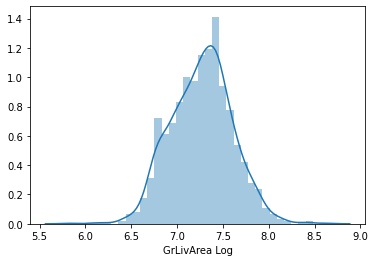

In [62]:
sns.distplot(df_concat['GrLivArea_Log'], axlabel='GrLivArea Log')

In [63]:
print("歪度(Skewness) :", df_concat['GrLivArea_Log'].skew())
print("尖度(Kurtosis) :", df_concat['GrLivArea_Log'].kurt())

歪度(Skewness) : -0.006995182187690808
尖度(Kurtosis) : 0.28260268850118564


3. YearBuilt

<AxesSubplot:xlabel='YearBuilt'>

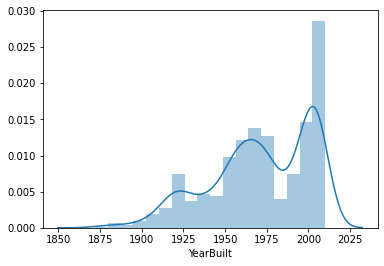

In [64]:
sns.distplot(df_concat['YearBuilt'])

時系データで対数変換無し\
2000年以降のデータが全体の約28%を構成

- 相関性の確認

In [65]:
corr_columns = ['GrLivArea_Log', 'YearBuilt', 'SalePrice_Log']
df_corr = pd.DataFrame(df_concat, columns=corr_columns)

In [66]:
corr_matrix = df_corr.corr()

<AxesSubplot:>

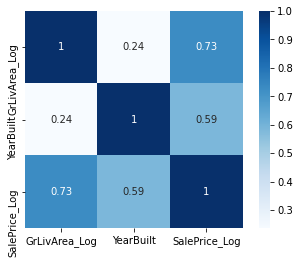

In [67]:
sns.heatmap(corr_matrix, annot=True, square=True, cmap="Blues")

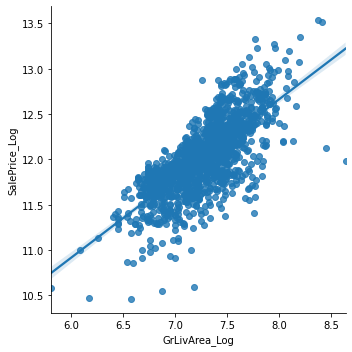

In [68]:
sns.lmplot(x='GrLivArea_Log',y='SalePrice_Log',data=df_concat)

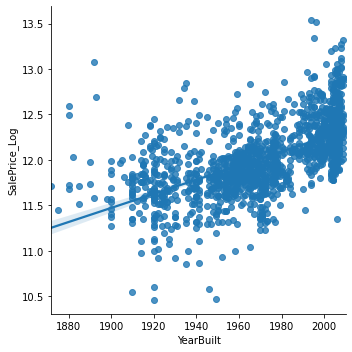

In [69]:
sns.lmplot(x='YearBuilt',y='SalePrice_Log',data=df_concat)

- 前処理・訓練データと検証データの分割

In [70]:
x_columns = ['GrLivArea_Log', 'YearBuilt']
y_column = ['SalePrice_Log']

df = df_corr.to_numpy()
X = df_corr[x_columns].to_numpy()
y = df_corr[y_column].to_numpy()

In [71]:
X_train, X_test, y_train, y_test = scratch_train_test_split(X, y, train_size=0.70)

- 前処理・標準化

In [72]:
scaler = StandardScaler()

In [73]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [74]:
X_train_scaled = scaler.transform(X_train)

In [75]:
X_test_scaled = scaler.transform(X_test)

- 線形回帰による学習、推定、評価、可視化

In [76]:
lr_model = SGDRegressor()
lr_model.fit(X_train_scaled, y_train.ravel())
lr_pred = lr_model.predict(X_test_scaled)

In [77]:
print("Mean Squared Error: {:.2f}".format(metrics.mean_squared_error(y_test, lr_pred)))

Mean Squared Error: 0.04


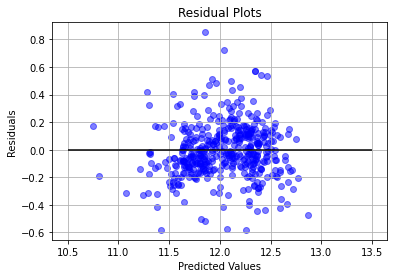

In [78]:
# テスト用データの残差プロット
plt.scatter(lr_pred, (lr_pred[:, np.newaxis] - y_test), c='b', alpha=0.5)

# y=0の水平線
plt.hlines(y=0,xmin=10.5,xmax=13.5, color='black')

plt.title('Residual Plots')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()

plt.show()  

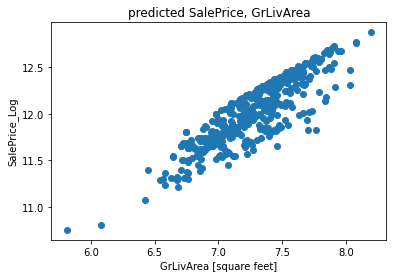

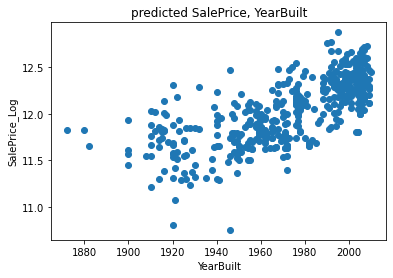

In [79]:
# 可視化
plt.title("predicted SalePrice, GrLivArea")
plt.xlabel("GrLivArea [square feet]")
plt.ylabel("SalePrice_Log")
plt.scatter(X_test[:, 0], lr_pred)
plt.show()

plt.title("predicted SalePrice, YearBuilt")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice_Log")
plt.scatter(X_test[:, 1], lr_pred)
plt.show()